In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
import warnings

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)



In [17]:
import os

data_dir = "."
data_files = ['lp1.data', 'lp2.data', 'lp3.data', 'lp4.data', 'lp5.data']

all_features = []
all_labels = []

for filename in data_files:
    filepath = os.path.join(data_dir, filename)
    if not os.path.exists(filepath):
        print(f"Warning: {filename} not found, skipping...")
        continue
    
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    current_label = None
    for line in lines:
        line = line.strip()
        if not line:
            continue
        
        if '\t' in line:
            parts = line.split('\t')
            features = [float(x) for x in parts if x.strip()]
            if len(features) >= 6 and current_label:
                all_features.append(features[:6])
                all_labels.append(current_label)
        else:
            current_label = line

X = pd.DataFrame(all_features)
y = pd.Series(all_labels)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())



Features shape: (6945, 6)
Target shape: (6945,)

Target distribution:
normal                1635
collision             1335
obstruction            825
collision_in_part      705
collision_in_tool      390
bottom_collision       390
bottom_obstruction     315
ok                     300
fr_collision           240
moved                  225
slightly_moved         135
left_col               135
back_col               105
front_col               90
right_col               75
lost                    45
Name: count, dtype: int64


In [18]:
le = LabelEncoder()
y_encoded = pd.Series(le.fit_transform(y), index=y.index)

print("Target distribution (encoded):")
print(y_encoded.value_counts().sort_index())



Target distribution (encoded):
0      105
1      390
2      315
3     1335
4      705
5      390
6      240
7       90
8      135
9       45
10     225
11    1635
12     825
13     300
14      75
15     135
Name: count, dtype: int64


In [19]:
print("Missing values:", X.isnull().sum().sum())
print("\nBasic statistics:")
display(X.describe().T.head(10))



Missing values: 0

Basic statistics:


,count,mean,std,min,25%,50%,75%,max
0,6945.0,-0.445644,56.324691,-883.0,-5.0,-1.0,2.0,462.0
1,6945.0,-3.198560,45.435957,-382.0,-5.0,0.0,3.0,438.0
2,6945.0,-81.442333,457.918479,-3617.0,-4.0,19.0,76.0,418.0
3,6945.0,-7.463643,87.306185,-824.0,-14.0,-2.0,5.0,1016.0
4,6945.0,-5.609935,76.833094,-725.0,-19.0,-5.0,3.0,756.0
5,6945.0,-2.885385,19.072189,-248.0,-6.0,-2.0,1.0,244.0


In [20]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=RANDOM_STATE
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")



Training set: (5556, 6)
Test set: (1389, 6)


In [21]:
log_reg = LogisticRegression(max_iter=500, random_state=RANDOM_STATE)
log_reg.fit(X_train_scaled, y_train)
log_pred = log_reg.predict(X_test_scaled)
log_acc = accuracy_score(y_test, log_pred)

print(f"Logistic Regression accuracy: {log_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, log_pred))



Logistic Regression accuracy: 0.3960

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.50      0.01      0.03        78
           2       0.57      0.06      0.11        63
           3       0.35      0.64      0.45       267
           4       0.50      0.03      0.05       141
           5       0.00      0.00      0.00        78
           6       0.00      0.00      0.00        48
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        27
           9       0.00      0.00      0.00         9
          10       0.20      0.02      0.04        45
          11       0.39      0.86      0.53       327
          12       0.62      0.53      0.57       165
          13       0.00      0.00      0.00        60
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        27

    accuracy       

In [22]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)
dt_acc = accuracy_score(y_test, dt_pred)

print(f"Decision Tree accuracy: {dt_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))

results = {
    'LogisticRegression': log_acc,
    'DecisionTree': dt_acc
}



Decision Tree accuracy: 0.3485

Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.05      0.04        21
           1       0.10      0.12      0.11        78
           2       0.09      0.13      0.11        63
           3       0.20      0.21      0.20       267
           4       0.03      0.03      0.03       141
           5       0.02      0.03      0.02        78
           6       0.76      0.71      0.73        48
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        27
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        45
          11       0.76      0.90      0.82       327
          12       0.54      0.47      0.50       165
          13       0.00      0.00      0.00        60
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        27

    accuracy             

In [23]:
rf = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, rf_pred)

print(f"Random Forest accuracy: {rf_acc:.4f}")
results['RandomForest'] = rf_acc



Random Forest accuracy: 0.3571


In [24]:
gb = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=RANDOM_STATE)
gb.fit(X_train_scaled, y_train)
gb_pred = gb.predict(X_test_scaled)
gb_acc = accuracy_score(y_test, gb_pred)

print(f"Gradient Boosting accuracy: {gb_acc:.4f}")
results['GradientBoosting'] = gb_acc



Gradient Boosting accuracy: 0.4075


In [25]:
ada = AdaBoostClassifier(n_estimators=200, random_state=RANDOM_STATE)
ada.fit(X_train_scaled, y_train)
ada_pred = ada.predict(X_test_scaled)
ada_acc = accuracy_score(y_test, ada_pred)

print(f"AdaBoost accuracy: {ada_acc:.4f}")
results['AdaBoost'] = ada_acc



AdaBoost accuracy: 0.3290


In [26]:
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)
display(results_df)



,Model,Accuracy
3,GradientBoosting,0.407487
0,LogisticRegression,0.395968
2,RandomForest,0.357091
1,DecisionTree,0.348452
4,AdaBoost,0.329014


In [27]:
estimators = [
    ('rf', rf),
    ('gb', gb),
    ('ada', ada)
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=500, random_state=RANDOM_STATE),
    cv=5,
    n_jobs=-1
)

stack.fit(X_train_scaled, y_train)
stack_pred = stack.predict(X_test_scaled)
stack_acc = accuracy_score(y_test, stack_pred)

print(f"Stacking Classifier accuracy: {stack_acc:.4f}")
results['Stacking'] = stack_acc

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)
display(results_df)



Stacking Classifier accuracy: 0.7207


,Model,Accuracy
5,Stacking,0.720662
3,GradientBoosting,0.407487
0,LogisticRegression,0.395968
2,RandomForest,0.357091
1,DecisionTree,0.348452
4,AdaBoost,0.329014


In [28]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5]
}

rf_base = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)
grid_rf = GridSearchCV(rf_base, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

print(f"Best Random Forest parameters: {grid_rf.best_params_}")
print(f"Best CV score: {grid_rf.best_score_:.4f}")

rf_tuned = grid_rf.best_estimator_
rf_tuned_pred = rf_tuned.predict(X_test_scaled)
rf_tuned_acc = accuracy_score(y_test, rf_tuned_pred)

print(f"Tuned Random Forest test accuracy: {rf_tuned_acc:.4f}")
results['RF_tuned'] = rf_tuned_acc



Best Random Forest parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}
Best CV score: 0.4462
Tuned Random Forest test accuracy: 0.4312


In [29]:
param_grid_gb = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.15]
}

gb_base = GradientBoostingClassifier(random_state=RANDOM_STATE)
grid_gb = GridSearchCV(gb_base, param_grid_gb, cv=3, scoring='accuracy', n_jobs=-1)
grid_gb.fit(X_train_scaled, y_train)

print(f"Best Gradient Boosting parameters: {grid_gb.best_params_}")
print(f"Best CV score: {grid_gb.best_score_:.4f}")

gb_tuned = grid_gb.best_estimator_
gb_tuned_pred = gb_tuned.predict(X_test_scaled)
gb_tuned_acc = accuracy_score(y_test, gb_tuned_pred)

print(f"Tuned Gradient Boosting test accuracy: {gb_tuned_acc:.4f}")
results['GB_tuned'] = gb_tuned_acc



Best Gradient Boosting parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
Best CV score: 0.4496
Tuned Gradient Boosting test accuracy: 0.4334


Final Results Summary:


,Model,Accuracy
5,Stacking,0.720662
7,GB_tuned,0.433405
6,RF_tuned,0.431246
3,GradientBoosting,0.407487
0,LogisticRegression,0.395968
2,RandomForest,0.357091
1,DecisionTree,0.348452
4,AdaBoost,0.329014



Best model: Stacking with accuracy 0.7207


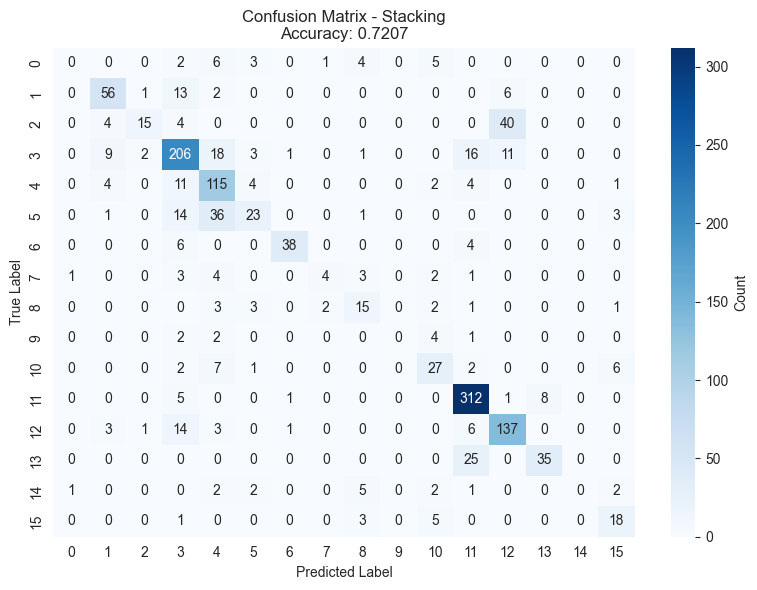

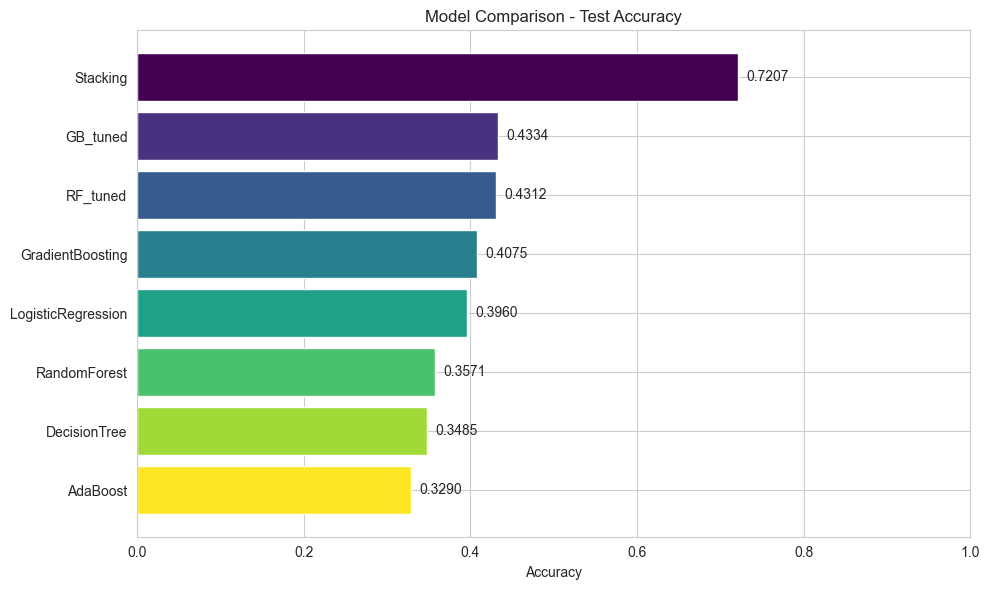

In [30]:
final_results = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
final_results = final_results.sort_values('Accuracy', ascending=False)

print("Final Results Summary:")
display(final_results)

best_final = final_results.iloc[0]
print(f"\nBest model: {best_final['Model']} with accuracy {best_final['Accuracy']:.4f}")

model_dict_final = {
    'LogisticRegression': log_reg,
    'DecisionTree': dt,
    'RandomForest': rf,
    'GradientBoosting': gb,
    'AdaBoost': ada,
    'Stacking': stack,
    'RF_tuned': rf_tuned,
    'GB_tuned': gb_tuned
}

best_model_final = model_dict_final[best_final['Model']]
best_pred_final = best_model_final.predict(X_test_scaled)

cm_final = confusion_matrix(y_test, best_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - {best_final["Model"]}\nAccuracy: {best_final["Accuracy"]:.4f}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(final_results)))
bars = plt.barh(final_results['Model'], final_results['Accuracy'], color=colors)
plt.xlabel('Accuracy')
plt.title('Model Comparison - Test Accuracy')
plt.xlim(0, 1)
for i, (idx, row) in enumerate(final_results.iterrows()):
    plt.text(row['Accuracy'] + 0.01, i, f"{row['Accuracy']:.4f}", va='center')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

